In [1]:
import pandas as pd

import numpy as np
from numpy.random import randn

import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sb

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = (14, 6)
plt.style.use('fivethirtyeight')

In [3]:
address = 'weather.csv'
df = pd.read_csv(address)
df.head()

,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,CloudCover,WindDirDegrees
0,38,23,52,30.03,10,8.0,5,281
1,36,18,46,30.02,10,7.0,3,275
2,40,21,47,29.86,10,8.0,1,277
3,25,9,44,30.05,10,9.0,3,345
4,20,-3,41,30.57,10,5.0,0,333


In [4]:
df.shape

(31, 8)

###### Return a fixed frequency DatetimeIndex

Of the four parameters start, end, periods, and freq, exactly three must be specified. If freq is omitted, the resulting DatetimeIndex will have periods linearly spaced elements between start and end.

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.date_range.html

freq B is business day, including only weekday

In [5]:
rng = pd.date_range(start = "12/19/2019", end = "1/30/2020", freq = 'B' )
rng

DatetimeIndex(['2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-30',
               '2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17', '2020-01-20', '2020-01-21',
               '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30'],
              dtype='datetime64[ns]', freq='B')

In [6]:
df.set_index(rng, inplace = True)
df

,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,CloudCover,WindDirDegrees
2019-12-19,38,23,52,30.03,10,8.0,5,281
2019-12-20,36,18,46,30.02,10,7.0,3,275
2019-12-23,40,21,47,29.86,10,8.0,1,277
2019-12-24,25,9,44,30.05,10,9.0,3,345
2019-12-25,20,-3,41,30.57,10,5.0,0,333
2019-12-26,33,4,35,30.50,10,4.0,0,259
2019-12-27,39,11,33,30.28,10,2.0,3,293
2019-12-30,39,29,64,30.20,10,4.0,8,79
2019-12-31,44,38,77,30.16,9,8.0,8,76
2020-01-01,50,46,71,29.59,4,NaN,7,109


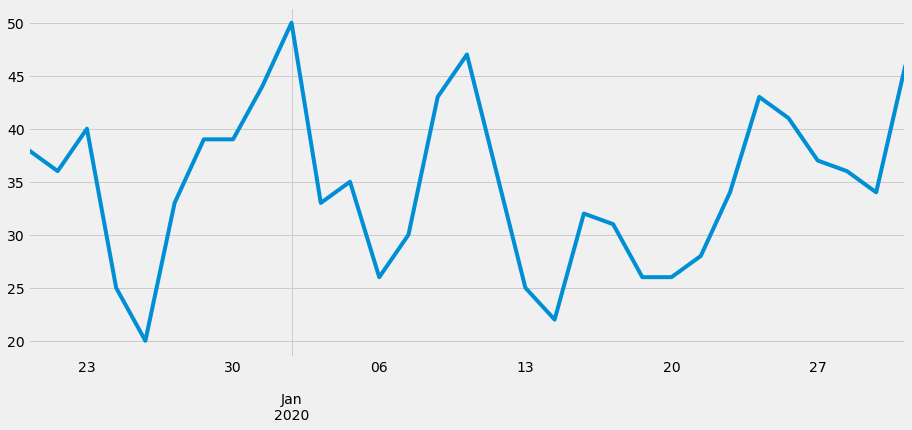

In [7]:
df['Temperature'].plot()
plt.show()

asfreq provides a further convenience so you can specify an interpolation method for any gaps that may appear after the frequency conversion

method{‘backfill’/’bfill’, ‘pad’/’ffill’}, default None
Method to use for filling holes in reindexed Series (note this does not fill NaNs that already were present):

‘pad’ / ‘ffill’: propagate last valid observation forward to next valid

In [8]:
df.asfreq('D', method = 'pad')

,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,CloudCover,WindDirDegrees
2019-12-19,38,23,52,30.03,10,8.0,5,281
2019-12-20,36,18,46,30.02,10,7.0,3,275
2019-12-21,36,18,46,30.02,10,7.0,3,275
2019-12-22,36,18,46,30.02,10,7.0,3,275
2019-12-23,40,21,47,29.86,10,8.0,1,277
2019-12-24,25,9,44,30.05,10,9.0,3,345
2019-12-25,20,-3,41,30.57,10,5.0,0,333
2019-12-26,33,4,35,30.50,10,4.0,0,259
2019-12-27,39,11,33,30.28,10,2.0,3,293
2019-12-28,39,11,33,30.28,10,2.0,3,293


In [9]:
df.asfreq('H', method = 'pad')

,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,CloudCover,WindDirDegrees
2019-12-19 00:00:00,38,23,52,30.03,10,8.0,5,281
2019-12-19 01:00:00,38,23,52,30.03,10,8.0,5,281
2019-12-19 02:00:00,38,23,52,30.03,10,8.0,5,281
2019-12-19 03:00:00,38,23,52,30.03,10,8.0,5,281
2019-12-19 04:00:00,38,23,52,30.03,10,8.0,5,281
2019-12-19 05:00:00,38,23,52,30.03,10,8.0,5,281
2019-12-19 06:00:00,38,23,52,30.03,10,8.0,5,281
2019-12-19 07:00:00,38,23,52,30.03,10,8.0,5,281
2019-12-19 08:00:00,38,23,52,30.03,10,8.0,5,281
2019-12-19 09:00:00,38,23,52,30.03,10,8.0,5,281


###### lets assumee that end date is unknown but we have periods

In [10]:
rng = pd.date_range(start = "12/19/2019", freq = 'B', periods = 32 )
rng

DatetimeIndex(['2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-30',
               '2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
               '2020-01-16', '2020-01-17', '2020-01-20', '2020-01-21',
               '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', freq='B')

In [11]:
df.loc["2019-12-19"]

Temperature              38.00
DewPoint                 23.00
Humidity                 52.00
Sea Level PressureIn     30.03
VisibilityMiles          10.00
WindSpeedMPH              8.00
CloudCover                5.00
WindDirDegrees          281.00
Name: 2019-12-19 00:00:00, dtype: float64

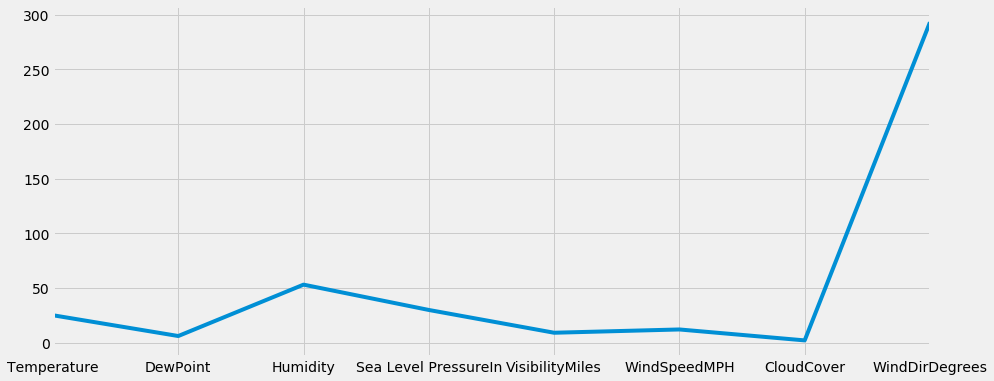

In [12]:
df.loc["2020-1-13"].plot()

plt.show()

In [13]:
df.loc["2019-12-19": "2020-1-19"]

,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,CloudCover,WindDirDegrees
2019-12-19,38,23,52,30.03,10,8.0,5,281
2019-12-20,36,18,46,30.02,10,7.0,3,275
2019-12-23,40,21,47,29.86,10,8.0,1,277
2019-12-24,25,9,44,30.05,10,9.0,3,345
2019-12-25,20,-3,41,30.57,10,5.0,0,333
2019-12-26,33,4,35,30.50,10,4.0,0,259
2019-12-27,39,11,33,30.28,10,2.0,3,293
2019-12-30,39,29,64,30.20,10,4.0,8,79
2019-12-31,44,38,77,30.16,9,8.0,8,76
2020-01-01,50,46,71,29.59,4,NaN,7,109


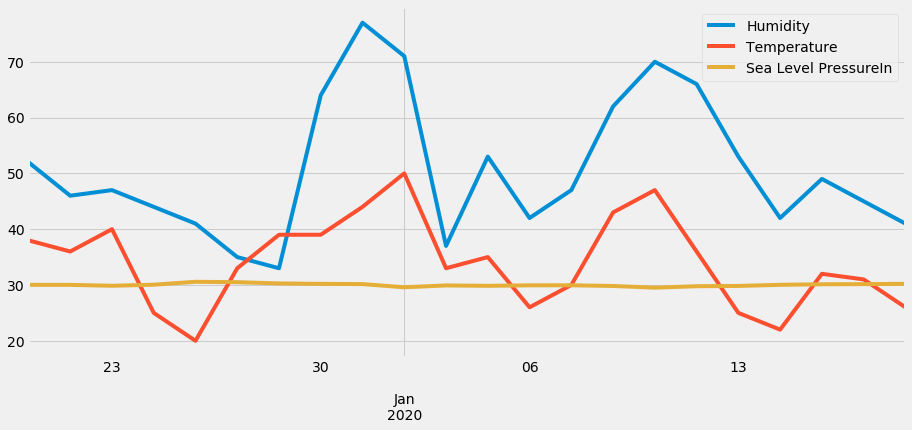

In [14]:
df.loc["2019-12-19": "2020-1-19"].Humidity.plot()
df.loc["2019-12-19": "2020-1-19"]['Temperature'].plot()
df.loc["2019-12-19": "2020-1-19"]['Sea Level PressureIn'].plot()

plt.legend(loc = 'best')
plt.show()